# Lecture 6
## Linear Optimization with JuMP (Part 1)
## Date: 14.11

*If one would take statistics about which mathematical problem is using up most of the computer time in
the world, then (not counting database handling problems like sorting and searching) the answer would
probably be linear programming.*

-László Lovász (1980)

# Introduction
A **linear programming problem** may be defined as the problem of **maximizing** or **minimizing** a **linear function** subject to linear constraints. The constraints may be expressed both in terms of equalities or inequalities.

As economists we tend to live in a linear, and sometimes quadratic world. Although this is true in many cases **this is not always true** so try to be **skeptic** about it.

## Formulation
The standard (LP) formulation is the following:

\begin{align}
\underset{x}{\text{Maximize }} &  c'x  \\
  \text{subject to } & \\
  &Ax \leq b \\
  & x \geq 0
\end{align}

Where:
* $x$ is the variable array to be maximized/minimized;
* $c$ and $b$ represent the coefficients array;
* $A$ is a matrix of coefficients.

The function object of maximization generally is called **objective function**.


**To be noted:** non negativity of the variable is not a requirement!

Consider the following problem:

\begin{align}
\underset{x_1, x_2}{\text{Maximize }} &  x_1 + x_2  \\
  \text{subject to } & \\
  & x_1 + 2x_2 \leq 4 \\
  & 4x_1 + 2x_2 \leq 12 \\
  & x_1 + x_2 \leq 1 \\
  & x_1, x_2 \geq 0
\end{align}

we can represent the deriving **politype** by means of Julia plotting features

In [1]:
using Plots;
pyplot();

In [2]:
f(x) = (-x + 4)/2 ;
g(x) = (-4x + 12)/2 ;
h(x) = (-x + 1) ;

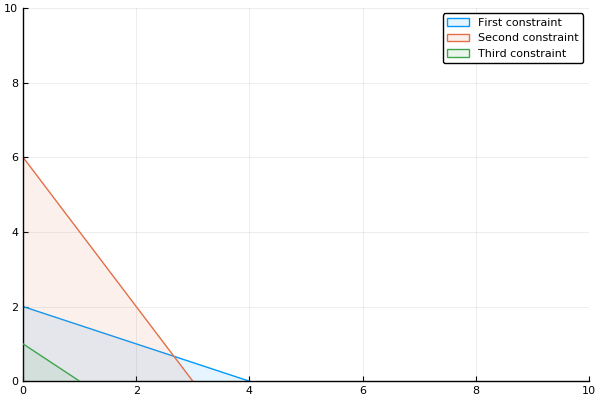

In [3]:
plot(f, 0:0.1:10, ylim=(0.0,10.0),xlim=(0.0,10.0), fill=(0, 0.1), label = "First constraint")
plot!(g, 0:0.1:10, fill=(0, 0.1), label = "Second constraint")
plot!(h, 0:0.1:10, fill=(0, 0.1), label = "Third constraint")

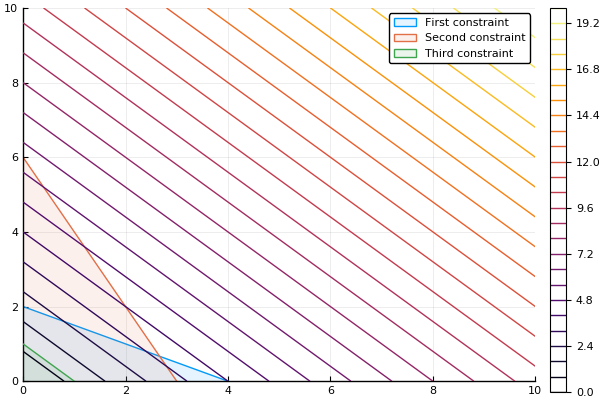

In [4]:
x = 0:0.1:10
y = 0:0.1:10
f(x, y) = x+y
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(f, X, Y)

contour!(x, y, Z,levels=30)

### Exercises

#### Ex 1
A baker has 150 kilograms of flour, 22 kilos of sugar, and 27.5 kilos of butter with
which to make two types of cake. Suppose that making one dozen A cakes requires three
kilos of flour, one kilo of sugar, and one kilo of butter, whereas making one dozen B cakes
requires six kilos of flour, half a kilo of sugar, and one kilo of butter. Suppose that the profit
from one dozen A cakes is 20 and from one dozen B cakes is 30. 

How many dozen A cakes ($x1$) and how many dozen B cakes ($x2$) will maximize the baker’s profit?

#### Solution
As in the previous example we start defining the problem in its mathematical form:

\begin{align}
\underset{x_1, x_2}{\text{Maximize }} &  20x_1 + 30x_2  \\
  \text{subject to } & \\
  & 3x_1 + 6x_2 \leq 150 \\
  & x_1 + 0.5x_2 \leq 22 \\
  & x_1 + x_2 \leq 27.5 \\
  & x_2 \geq 0 \\
  & x_1 \geq 0
\end{align}

In [5]:
f(x) = (-3x + 150)/6 ;
g(x) = (-x + 22)/0.5 ;
h(x) = (-x + 27.5) ;

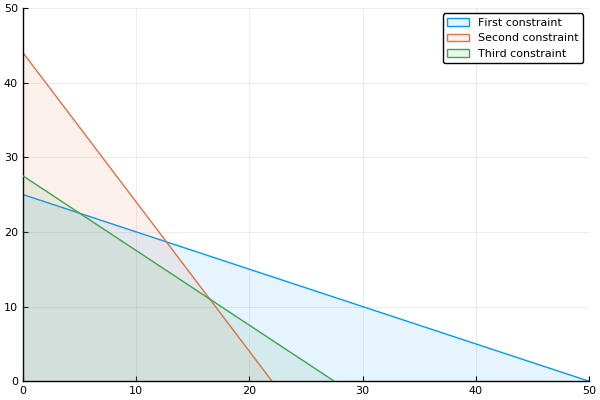

In [6]:
plot(f, 0:0.1:150, ylim=(0,50),xlim=(0.0,50), fill=(0, 0.1), label = "First constraint")
plot!(g, 0:0.1:150, fill=(0, 0.1), label = "Second constraint")
plot!(h, 0:0.1:150, fill=(0, 0.1), label = "Third constraint")

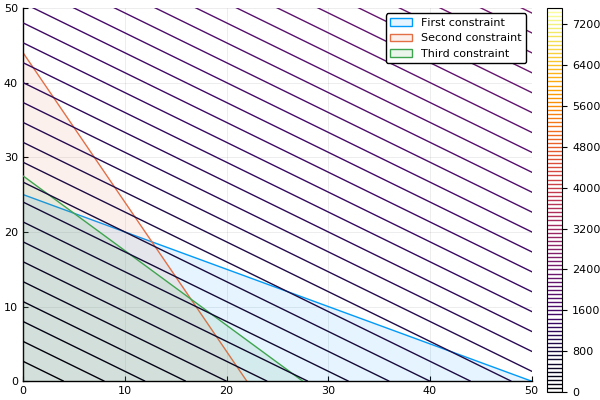

In [7]:
x = 0:0.1:150
y = 0:0.1:150
f(x, y) = 20x+30y
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(f, X, Y)

contour!(x, y, Z,levels=100)

#### Ex 2
A firm is producing two goods, $A$ and $B$. It has two factories that jointly produce the two goods in the following quantities (per hour):

| Good  | Factory 1 | Factory 2 |
|-------|-----------|-----------|
| **A** | 10        | 20        |
| **B** | 25        | 25        |

The firm receives an order for 300 units of A and 500 units of B. The costs of operating
the two factories are 10 000 and 8000 per hour. 

Formulate the linear programming problem of minimizing the total cost of meeting this order.

#### Solution
As in the previous exercise we start defining the problem in its mathematical form:

\begin{align}
\underset{x_1, x_2}{\text{Minimize }} &  10000x_1 + 8000x_2  \\
  \text{subject to } & \\
  & 10 x_1 + 20 x_2 \geq 300 \\
  & 25 x_1 + 25 x_2 \geq 500 \\
  & x_2 \geq 0 \\
  & x_1 \geq 0
\end{align}

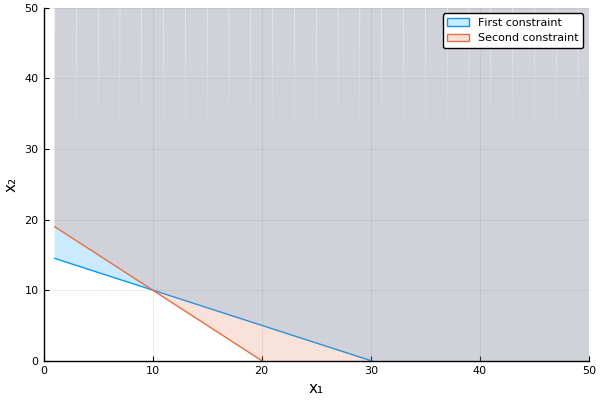

In [8]:
f(x) = (-10x +300)/20
g(x) = (-25x + 500)/25 

plot(f,1:50,
    ylims=(0,50),
    xlims=(0,50), 
    fill=([30,1000], 0.2), 
    label = "First constraint",
    xlabel = "x₁",
    ylabel = "x₂")

plot!(g, 1:50,fill=([30,1000], 0.2), label = "Second constraint")

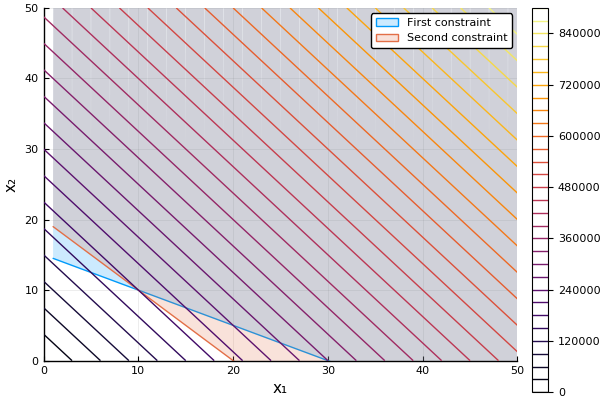

In [9]:
x = 0:0.1:50
y = 0:0.1:50
f(x, y) = 10000x+8000y
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(f, X, Y)

contour!(x, y, Z,levels=30)

#### Ex 3
Suppose firm A is able to produce 2 goods $x \in \{x_1,x_2\}$  in continuos quantity $x \subset \mathbb{R}^2$. The firm goods are not sold at the same price, in particular $x_1$ guarantees twice the revenue of $x_2$. Because of this reason the management set a KPI, tracking the ratio of $x_1$ over $x_2$ to be greater than 1. Moreover the material used to produce $x_1$ can be produced with half the material used to produce $x_2$ and the total material at disposal of the firm is 50. Lastly, 30 $x_2$ units has already been booked by one of the abitual firm's customer.

Depict graphically the problem and argue on the optimal solution.

#### Solution
As in the previous example we start defining the problem in its mathematical form:

\begin{align}
\underset{x_1, x_2}{\text{Maximize }} &  2x_1 + x_2  \\
  \text{subject to } & \\
  & \frac{1}{2}x_1 + x_2 \leq 50 \\
  & \frac{x_1}{x_2} \geq 1 \\
  & x_2 \geq 30 \\
  & x_1 \geq 0
\end{align}

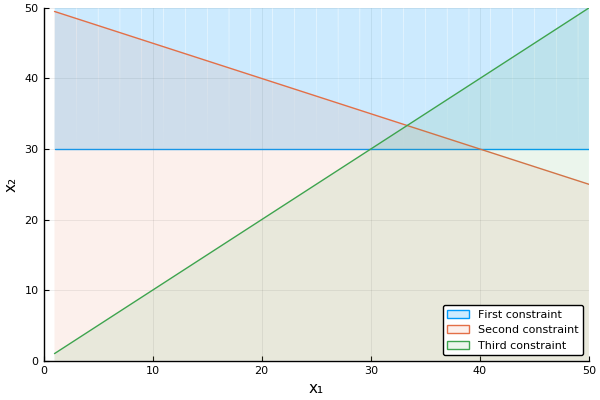

In [10]:
f(x) = 30
g(x) = -0.5x + 50 
h(x) =  x 

plot(f,1:50,
    ylims=(0,50),
    xlims=(0,50), 
    fill=([30,1000], 0.2), 
    label = "First constraint",
    xlabel = "x₁",
    ylabel = "x₂")

plot!(g, 1:50,fill=(0, 0.1), label = "Second constraint")
plot!(h,1:50,fill=(0, 0.1), label = "Third constraint")

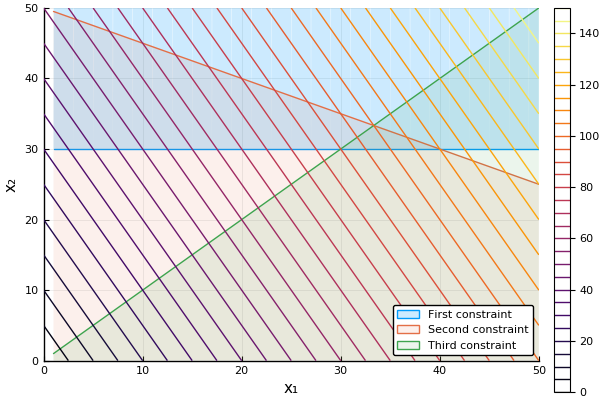

In [11]:
x = 0:0.1:50
y = 0:0.1:50
f(x, y) = 2x+y
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(f, X, Y)

contour!(x, y, Z,levels=30)

## Some considerations

The **graphical method** showed before can be feasible in reasonably **simple** settings however in higher then 3 dimensions it becomes **not practical**.

In the next lectures we'll use a **modeling language** to define such problem and an **ad-hoc solver** to find the optimal solution.